# Impact of data cleaning

In [4]:
import pandas as pd
import numpy as np

# Load all the data files as a csv files
df_benin = pd.read_csv('../data/benin-malanville.csv')
df_sierraleone = pd.read_csv('../data/sierraleone-bumbuna.csv')
df_togo = pd.read_csv('../data/togo-dapaong_qc.csv')

def clean_data(df):
    """
    Clean the dataset by:
    - Removing columns with all NaN values
    - Converting columns to appropriate data types
    - Handling missing values and non-numeric entries
    - Removing duplicates
    - Performing any additional cleaning required
    
    Parameters:
    df (pd.DataFrame): The DataFrame to clean.
    
    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Convert columns to appropriate data types
    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Handle missing values: for simplicity, fill missing values with the mean of the column
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    # Handle categorical columns: fill missing values with the mode
    categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    return df

def analyze_data(df, dataset_name):
    """
    Analyze the dataset before and after cleaning.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    dataset_name (str): The name of the dataset (for reporting).
    
    Returns:
    None
    """
    # Inspect data before cleaning
    print(f"\nInspection Before Cleaning - {dataset_name} Dataset:")
    print(df.info())
    print(df.describe())
    
    # Clean the dataset
    df_cleaned = clean_data(df.copy())
    
    # Inspect data after cleaning
    print(f"\nInspection After Cleaning - {dataset_name} Dataset:")
    print(df_cleaned.info())
    print(df_cleaned.describe())

def main():
    datasets = {
        "Benin": df_benin,
        "Sierra Leone": df_sierraleone,
        "Togo": df_togo
    }
    
    for name, df in datasets.items():
        analyze_data(df, name)

if __name__ == "__main__":
    main()



Inspection Before Cleaning - Benin Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-nul

# 1. Data Summary Before and After Cleaning


Inspection Before Cleaning - Benin Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-nul

C:\Users\user\AppData\Local\Temp\ipykernel_17712\2810281412.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for other columns if necessary



Inspection After Cleaning - Benin Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null

KeyError: 'Comments'

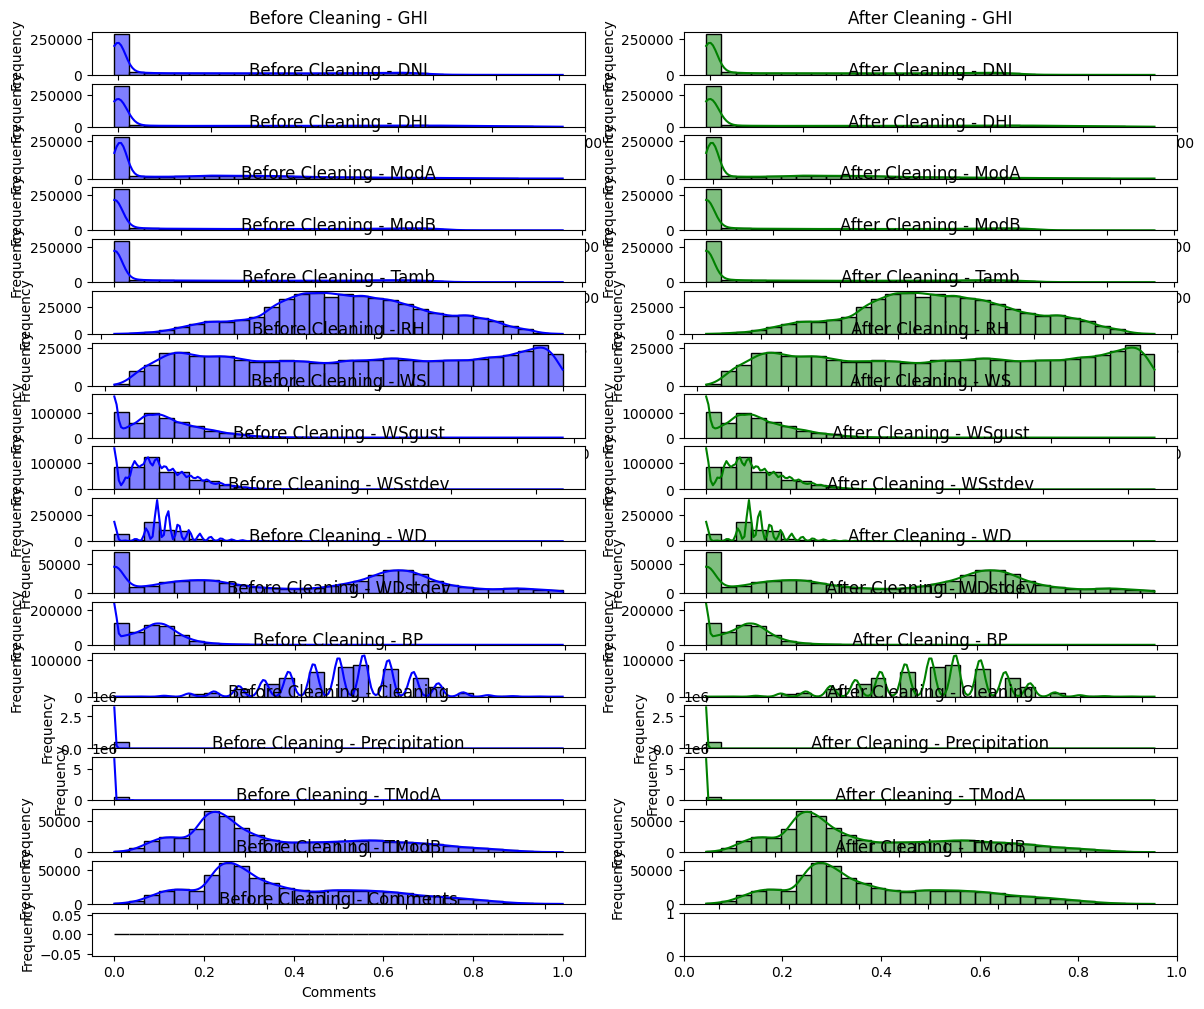

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def clean_data(df):
    """
    Clean the dataset by handling missing values, duplicates, and incorrect data types.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to clean.
    
    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # Drop the 'Comments' column if it exists
    if 'Comments' in df.columns:
        df = df.drop(columns=['Comments'])
    
    # Drop duplicate rows
    df = df.drop_duplicates()
    
    # Fill missing values or drop rows with missing critical columns
    df = df.dropna(subset=['Tamb'])  # Example: Drop rows where 'Tamb' is missing
    df = df.fillna(method='ffill')  # Forward fill for other columns if necessary

    # Convert columns to appropriate types if needed
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    return df

def plot_data_summary(df_before, df_after, dataset_name):
    """
    Plot data summary to visualize the impact of cleaning.
    
    Parameters:
    df_before (pd.DataFrame): DataFrame before cleaning.
    df_after (pd.DataFrame): DataFrame after cleaning.
    dataset_name (str): The name of the dataset.
    
    Returns:
    None
    """
    # Plot histograms for numeric columns before and after cleaning
    numeric_columns_before = df_before.select_dtypes(include=[np.number]).columns
    numeric_columns_after = df_after.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(14, 12))
    
    for i, column in enumerate(numeric_columns_before):
        plt.subplot(len(numeric_columns_before), 2, 2*i + 1)
        sns.histplot(df_before[column], bins=30, kde=True, color='blue')
        plt.title(f'Before Cleaning - {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        plt.subplot(len(numeric_columns_before), 2, 2*i + 2)
        sns.histplot(df_after[column], bins=30, kde=True, color='green')
        plt.title(f'After Cleaning - {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def plot_missing_values(df, dataset_name):
    """
    Plot a heatmap of missing values to visualize the pattern of missing data.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to visualize.
    dataset_name (str): The name of the dataset.
    
    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isna(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values Heatmap for {dataset_name}')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

def plot_duplicate_rows(df_before, df_after, dataset_name):
    """
    Plot the number of rows before and after cleaning to visualize the impact of duplicate removal.
    
    Parameters:
    df_before (pd.DataFrame): DataFrame before cleaning.
    df_after (pd.DataFrame): DataFrame after cleaning.
    dataset_name (str): The name of the dataset.
    
    Returns:
    None
    """
    before_count = len(df_before)
    after_count = len(df_after)
    
    plt.figure(figsize=(8, 6))
    plt.bar(['Before Cleaning', 'After Cleaning'], [before_count, after_count], color=['blue', 'green'])
    plt.title(f'Number of Rows Before and After Cleaning - {dataset_name}')
    plt.ylabel('Number of Rows')
    plt.show()

def plot_data_types(df_before, df_after, dataset_name):
    """
    Plot the data types before and after cleaning to visualize the impact on data types.
    
    Parameters:
    df_before (pd.DataFrame): DataFrame before cleaning.
    df_after (pd.DataFrame): DataFrame after cleaning.
    dataset_name (str): The name of the dataset.
    
    Returns:
    None
    """
    data_types_before = df_before.dtypes.value_counts()
    data_types_after = df_after.dtypes.value_counts()
    
    df_types = pd.DataFrame({
        'Before Cleaning': data_types_before,
        'After Cleaning': data_types_after
    }).fillna(0)
    
    df_types.plot(kind='bar', figsize=(12, 8))
    plt.title(f'Data Types Before and After Cleaning - {dataset_name}')
    plt.ylabel('Number of Columns')
    plt.xlabel('Data Type')
    plt.show()

def analyze_data_with_plots(df, dataset_name):
    """
    Analyze the dataset and plot data summary before and after cleaning.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    dataset_name (str): The name of the dataset (for reporting).
    
    Returns:
    None
    """
    # Inspect data before cleaning
    print(f"\nInspection Before Cleaning - {dataset_name} Dataset:")
    print(df.info())
    print(df.describe())
    
    # Clean the dataset
    df_cleaned = clean_data(df.copy())
    
    # Inspect data after cleaning
    print(f"\nInspection After Cleaning - {dataset_name} Dataset:")
    print(df_cleaned.info())
    print(df_cleaned.describe())
    
    # Plot data summary
    plot_data_summary(df, df_cleaned, dataset_name)
    plot_missing_values(df, dataset_name)
    plot_missing_values(df_cleaned, dataset_name)
    plot_duplicate_rows(df, df_cleaned, dataset_name)
    plot_data_types(df, df_cleaned, dataset_name)

def main():
    datasets = {
        "Benin": df_benin,
        "Sierra Leone": df_sierraleone,
        "Togo": df_togo
    }
    
    for name, df in datasets.items():
        analyze_data_with_plots(df, name)

if __name__ == "__main__":
    main()


# 2. Missing Values Visualization


Missing Values Before Cleaning - Benin Dataset:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


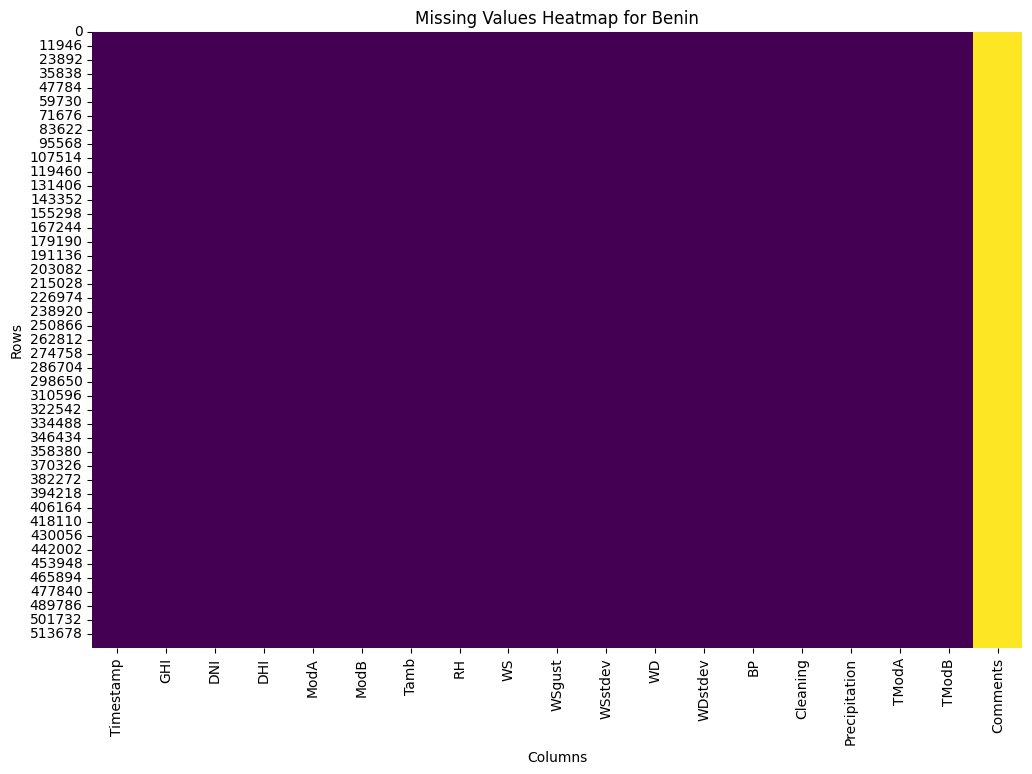


Missing Values Before Cleaning - Sierra Leone Dataset:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


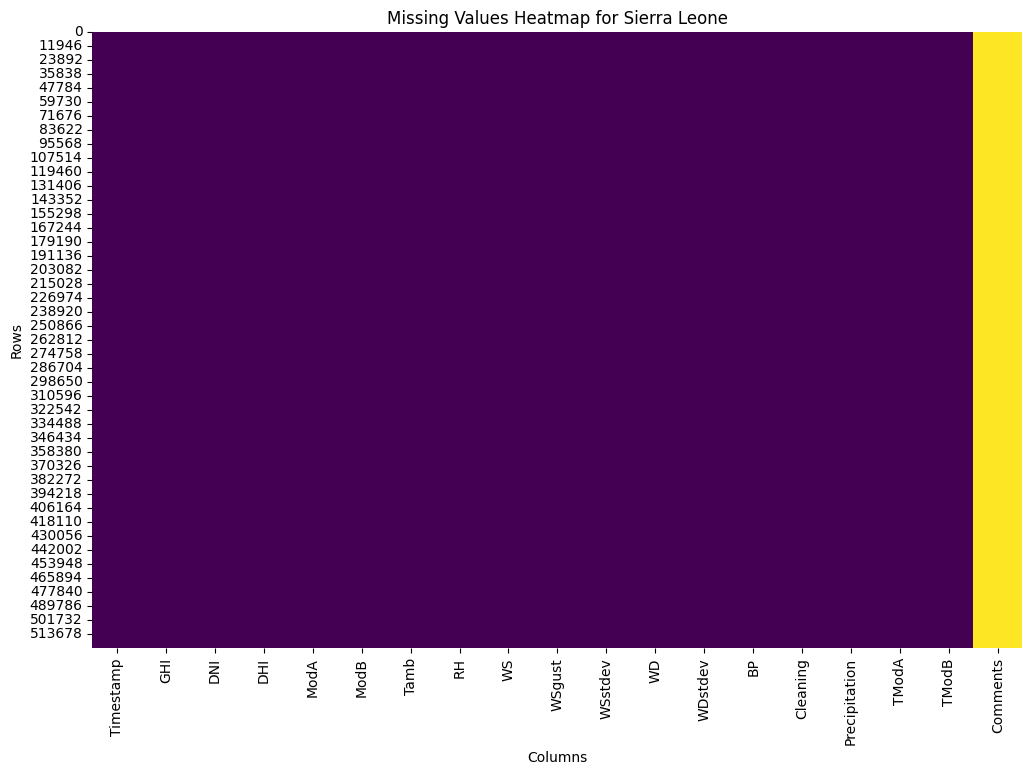


Missing Values Before Cleaning - Togo Dataset:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


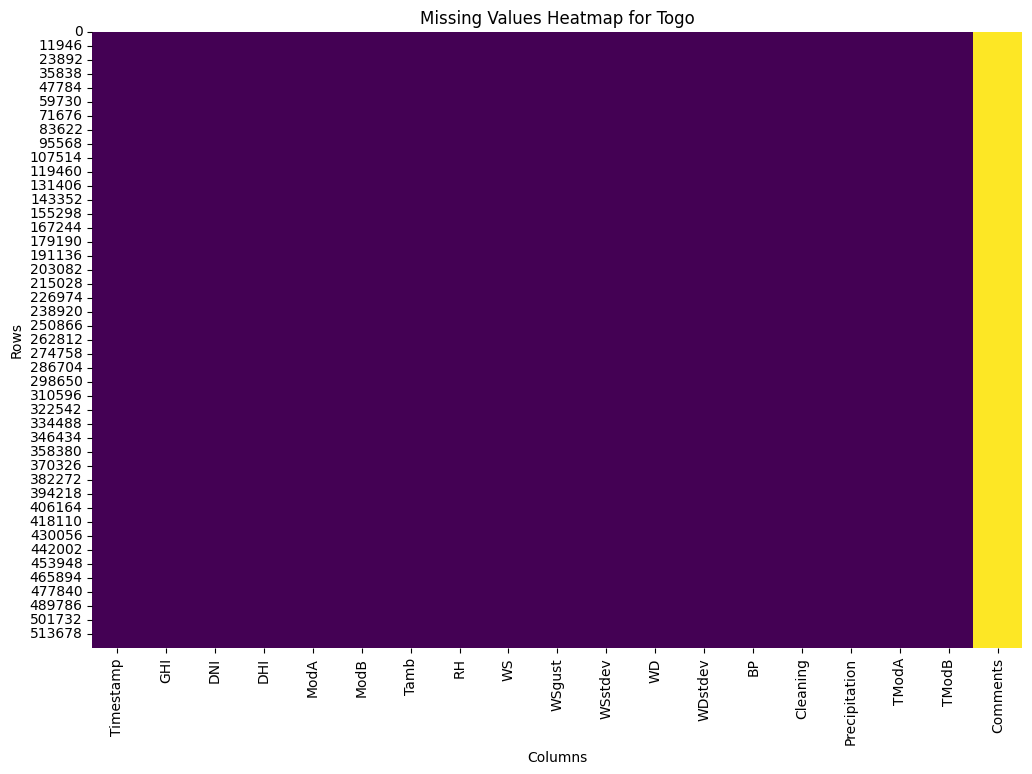

In [7]:
def plot_missing_values(df, dataset_name):
    """
    Plot a heatmap of missing values to visualize the pattern of missing data.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to visualize.
    dataset_name (str): The name of the dataset.
    
    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isna(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values Heatmap for {dataset_name}')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Example usage
def analyze_data_with_missing_values(df, dataset_name):
    """
    Analyze the dataset and plot missing values heatmap.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    dataset_name (str): The name of the dataset (for reporting).
    
    Returns:
    None
    """
    # Inspect missing values before cleaning
    print(f"\nMissing Values Before Cleaning - {dataset_name} Dataset:")
    print(df.isna().sum())
    
    # Plot missing values
    plot_missing_values(df, dataset_name)

def main():
    datasets = {
        "Benin": df_benin,
        "Sierra Leone": df_sierraleone,
        "Togo": df_togo
    }
    
    for name, df in datasets.items():
        analyze_data_with_missing_values(df, name)

if __name__ == "__main__":
    main()


# 3. Duplicate Rows


Number of Rows Before Cleaning - Benin Dataset: 525600


C:\Users\user\AppData\Local\Temp\ipykernel_17712\2810281412.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for other columns if necessary


Number of Rows After Cleaning - Benin Dataset: 525600


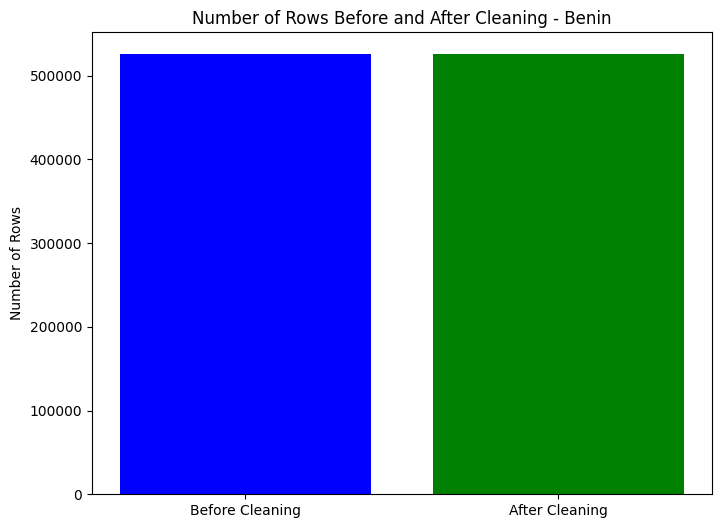


Number of Rows Before Cleaning - Sierra Leone Dataset: 525600


C:\Users\user\AppData\Local\Temp\ipykernel_17712\2810281412.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for other columns if necessary


Number of Rows After Cleaning - Sierra Leone Dataset: 525600


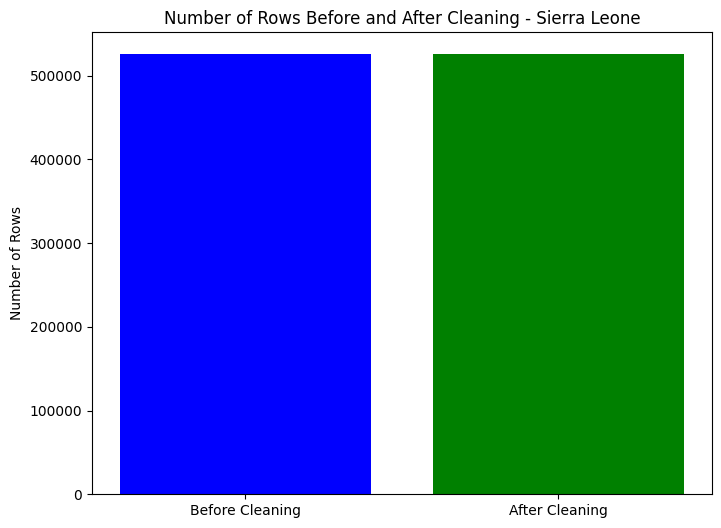


Number of Rows Before Cleaning - Togo Dataset: 525600


C:\Users\user\AppData\Local\Temp\ipykernel_17712\2810281412.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for other columns if necessary


Number of Rows After Cleaning - Togo Dataset: 525600


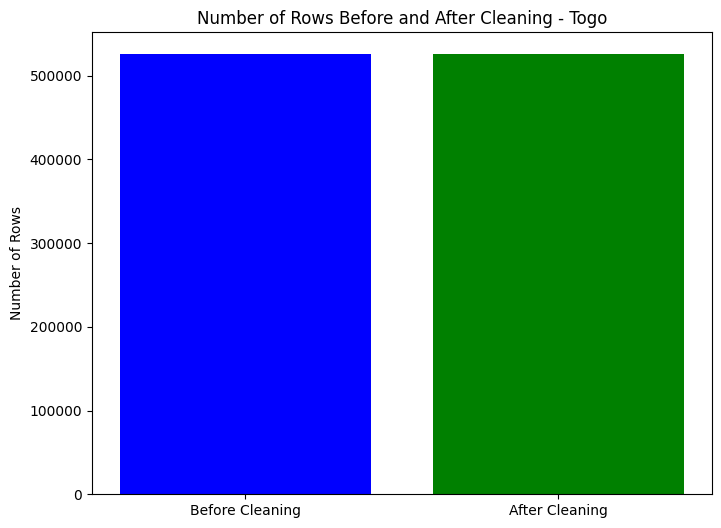

In [8]:
def plot_duplicate_rows(df_before, df_after, dataset_name):
    """
    Plot the number of rows before and after cleaning to visualize the impact of duplicate removal.
    
    Parameters:
    df_before (pd.DataFrame): DataFrame before cleaning.
    df_after (pd.DataFrame): DataFrame after cleaning.
    dataset_name (str): The name of the dataset.
    
    Returns:
    None
    """
    before_count = len(df_before)
    after_count = len(df_after)
    
    plt.figure(figsize=(8, 6))
    plt.bar(['Before Cleaning', 'After Cleaning'], [before_count, after_count], color=['blue', 'green'])
    plt.title(f'Number of Rows Before and After Cleaning - {dataset_name}')
    plt.ylabel('Number of Rows')
    plt.show()

# Example usage
def analyze_data_with_duplicates(df, dataset_name):
    """
    Analyze the dataset and plot the number of rows before and after cleaning.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    dataset_name (str): The name of the dataset (for reporting).
    
    Returns:
    None
    """
    # Inspect data before cleaning
    print(f"\nNumber of Rows Before Cleaning - {dataset_name} Dataset: {len(df)}")
    
    # Clean the dataset
    df_cleaned = clean_data(df.copy())
    
    # Inspect data after cleaning
    print(f"Number of Rows After Cleaning - {dataset_name} Dataset: {len(df_cleaned)}")
    
    # Plot the number of rows before and after cleaning
    plot_duplicate_rows(df, df_cleaned, dataset_name)

def main():
    datasets = {
        "Benin": df_benin,
        "Sierra Leone": df_sierraleone,
        "Togo": df_togo
    }
    
    for name, df in datasets.items():
        analyze_data_with_duplicates(df, name)

if __name__ == "__main__":
    main()


# 4. Data Type Changes


Data Types Before Cleaning - Benin Dataset:
float64    16
int64       2
object      1
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_17712\2810281412.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for other columns if necessary



Data Types After Cleaning - Benin Dataset:
float64    15
int64       2
object      1
Name: count, dtype: int64


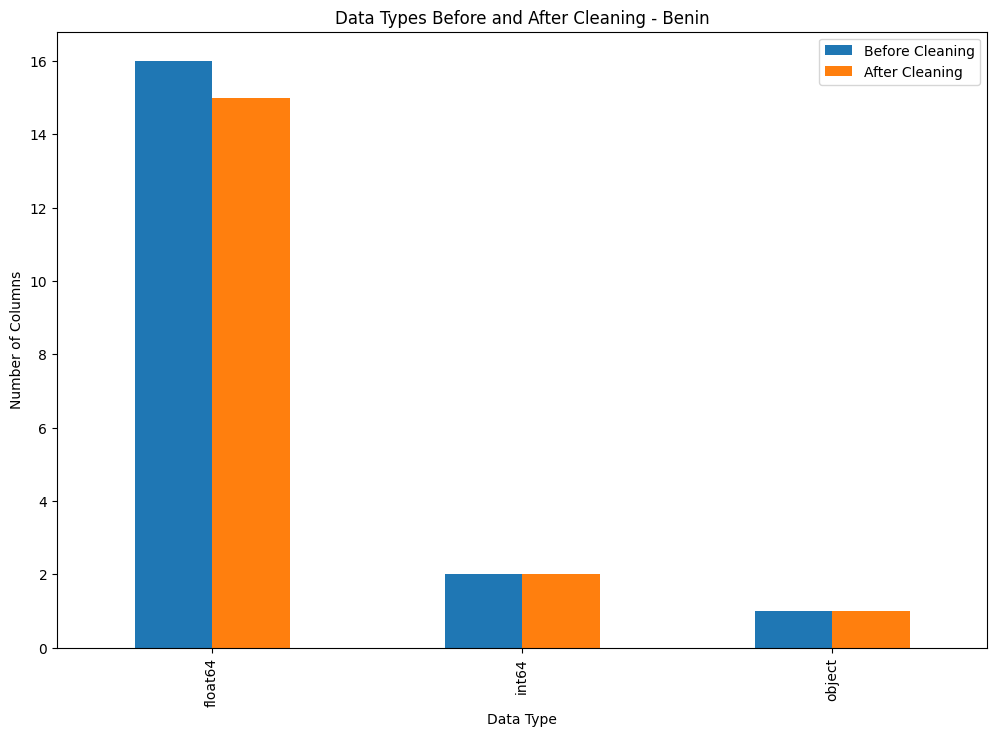


Data Types Before Cleaning - Sierra Leone Dataset:
float64    16
int64       2
object      1
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_17712\2810281412.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for other columns if necessary



Data Types After Cleaning - Sierra Leone Dataset:
float64    15
int64       2
object      1
Name: count, dtype: int64


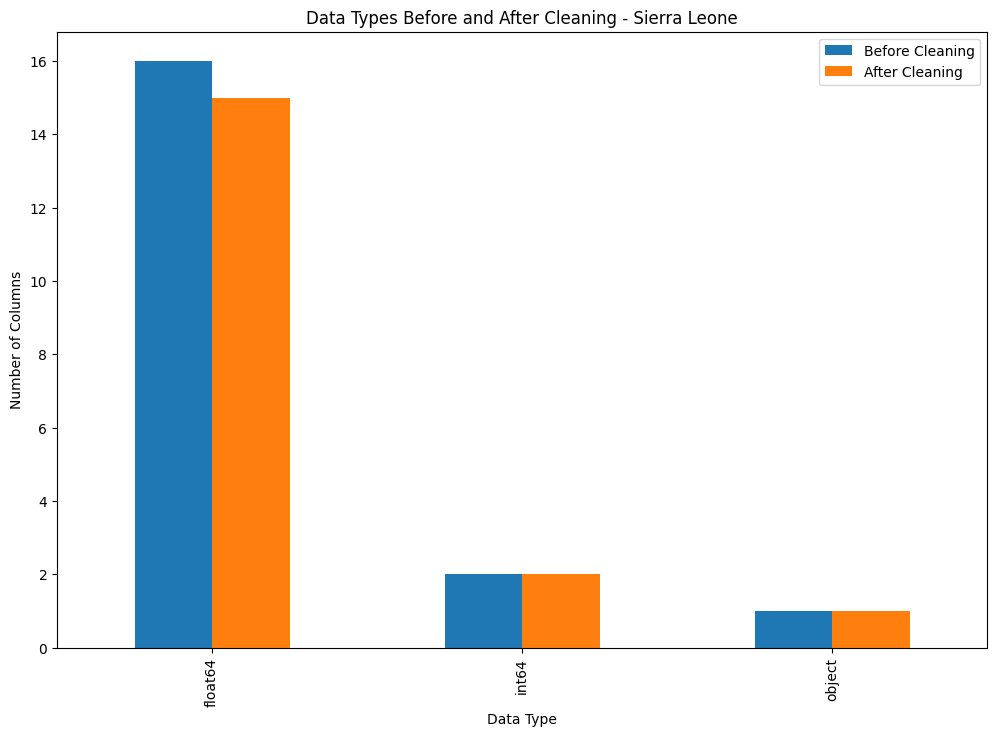


Data Types Before Cleaning - Togo Dataset:
float64    16
int64       2
object      1
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_17712\2810281412.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for other columns if necessary



Data Types After Cleaning - Togo Dataset:
float64    15
int64       2
object      1
Name: count, dtype: int64


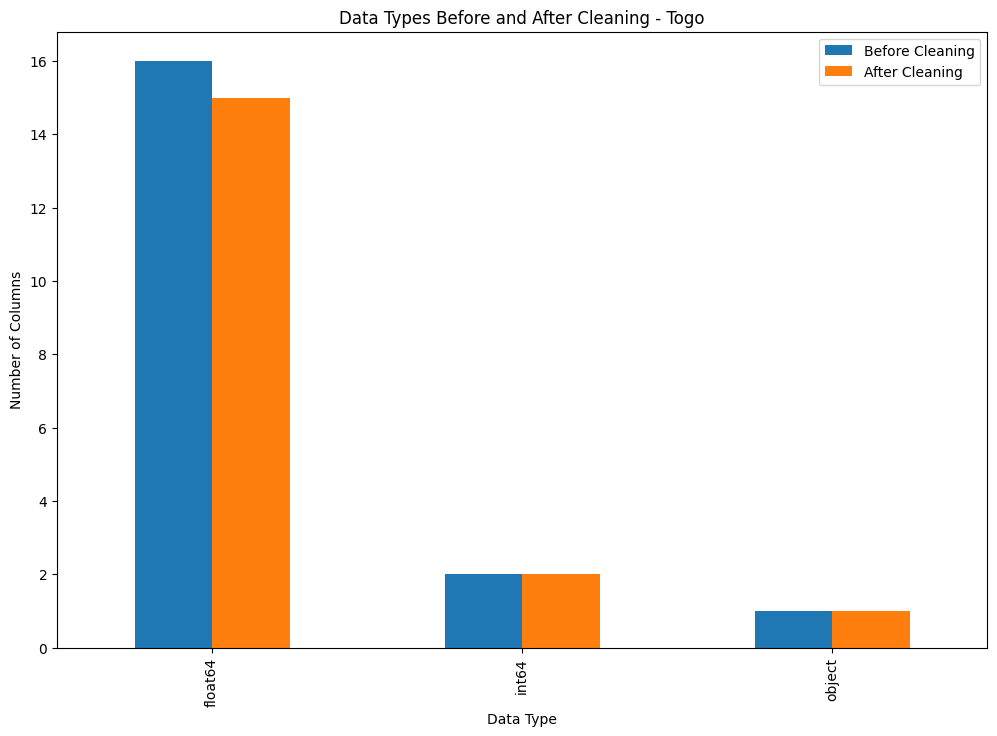

In [9]:
def plot_data_types(df_before, df_after, dataset_name):
    """
    Plot the data types before and after cleaning to visualize the impact on data types.
    
    Parameters:
    df_before (pd.DataFrame): DataFrame before cleaning.
    df_after (pd.DataFrame): DataFrame after cleaning.
    dataset_name (str): The name of the dataset.
    
    Returns:
    None
    """
    data_types_before = df_before.dtypes.value_counts()
    data_types_after = df_after.dtypes.value_counts()
    
    df_types = pd.DataFrame({
        'Before Cleaning': data_types_before,
        'After Cleaning': data_types_after
    }).fillna(0)
    
    df_types.plot(kind='bar', figsize=(12, 8))
    plt.title(f'Data Types Before and After Cleaning - {dataset_name}')
    plt.ylabel('Number of Columns')
    plt.xlabel('Data Type')
    plt.show()

# Example usage
def analyze_data_with_data_types(df, dataset_name):
    """
    Analyze the dataset and plot data types before and after cleaning.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    dataset_name (str): The name of the dataset (for reporting).
    
    Returns:
    None
    """
    # Inspect data types before cleaning
    print(f"\nData Types Before Cleaning - {dataset_name} Dataset:")
    print(df.dtypes.value_counts())
    
    # Clean the dataset
    df_cleaned = clean_data(df.copy())
    
    # Inspect data types after cleaning
    print(f"\nData Types After Cleaning - {dataset_name} Dataset:")
    print(df_cleaned.dtypes.value_counts())
    
    # Plot data types before and after cleaning
    plot_data_types(df, df_cleaned, dataset_name)

def main():
    datasets = {
        "Benin": df_benin,
        "Sierra Leone": df_sierraleone,
        "Togo": df_togo
    }
    
    for name, df in datasets.items():
        analyze_data_with_data_types(df, name)

if __name__ == "__main__":
    main()
